In [2]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [4]:
xls = pd.ExcelFile('C:/Users/eyp_d/Desktop/VBO-Bootcamp-Dersler/5.Hafta/Ders Öncesi Notlar/ab_testing.xlsx')
df_control_ = pd.read_excel(xls, 'Control Group')
df_test_ = pd.read_excel(xls, 'Test Group')

In [5]:
df_control = df_control_[["Impression", "Click", "Purchase", "Earning"]]
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


C:\Users\eyp_d\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


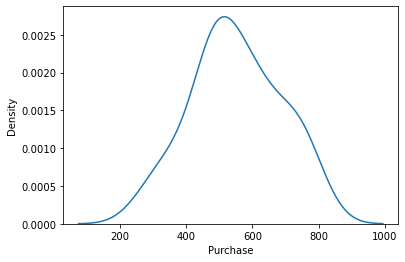

In [6]:
sns.distplot(df_control["Purchase"], hist=False)      # Normal dağılımın grafiksel gözlemlenmesi
plt.show()

In [8]:
df_test = df_test_[["Impression", "Click", "Purchase", "Earning"]]
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


C:\Users\eyp_d\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


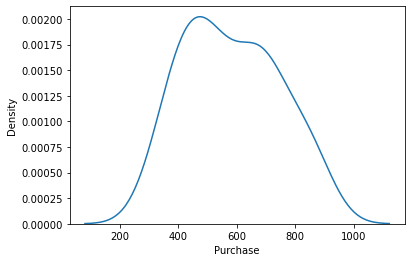

In [9]:
sns.distplot(df_test["Purchase"], hist=False)        # Normal dağılımın grafiksel gözlemlenmesi
plt.show();

In [28]:
df_control.describe()

,Impression,Click,Purchase,Earning
count,40.00000,40.00000,40.00000,40.00000
mean,101711.44907,5100.65737,550.89406,1908.56830
std,20302.15786,1329.98550,134.10820,302.91778
min,45475.94296,2189.75316,267.02894,1253.98952
25%,85726.69035,4124.30413,470.09553,1685.84720
50%,99790.70108,5001.22060,531.20631,1975.16052
75%,115212.81654,5923.80360,637.95709,2119.80278
max,147539.33633,7959.12507,801.79502,2497.29522


In [29]:
df_test.describe()

,Impression,Click,Purchase,Earning
count,40.00000,40.00000,40.00000,40.00000
mean,120512.41176,3967.54976,582.10610,2514.89073
std,18807.44871,923.09507,161.15251,282.73085
min,79033.83492,1836.62986,311.62952,1939.61124
25%,112691.97077,3376.81902,444.62683,2280.53743
50%,119291.30077,3931.35980,551.35573,2544.66611
75%,132050.57893,4660.49791,699.86236,2761.54540
max,158605.92048,6019.69508,889.91046,3171.48971


## Görev 1:

#### A/B testinin hipotezini tanımlayınız.

H0: M1 = M2 (Maximum Bidding ile Average Bidding kazançları arasında istatistiksel olarak anlamlı fark yoktur.)

H1: M1 != M2 (Maximum Bidding ile Average Bidding kazançları arasında istatistiksel olarak anlamlı fark vardır)

## Görev 2:

#### Çıkan test sonuçlarının istatistiksel olarak anlamlı olup olmadığını yorumlayınız.

##### 1. Varsayım Kontrolü

###### a) Normallik Varsayımı

H0: Normal dağılım varsayımı sağlanmaktadır.

H1: ..sağlanmamaktadır.

In [30]:
test_stat, pvalue = shapiro(df_control["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891


In [31]:
test_stat, pvalue = shapiro(df_test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9589, p-value = 0.1541


p-value > 0.05 olduğundan H0 red edilemez.
Her iki veri setindeki Purchase verileri normal dağılım göstermektedir.

###### b) Varyans Homojenligi Varsayımı

H0: Varyanslar Homojendir

H1: Varyanslar Homojen Değildir

In [32]:
test_stat, pvalue = levene(df_control["Purchase"],
                           df_test["Purchase"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


p-value > 0.05 olduğundan H0 red edilemez. Her iki veri setindeki Purchase verilerin varyansları homojendir.

##### 2. Hipotezin Uygulanması

###### Normallik varsayımı sağlandığından bağımsız iki örneklem t testi (parametrik test) uygulanacaktır.

In [33]:
test_stat, pvalue = ttest_ind(df_control["Purchase"],
                              df_test["Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


p-value > 0.05 olduğundan H0 red edilemez. Her iki bidding yönteminin şirkete getireceği satın alma sayısı(Purchase) arasında istatiksel olarak anlamlı bir fark yoktur. 

## Görev 3:

#### Hangi testleri kullandınız? Sebeplerini belirtiniz.

Her iki normallik varsayımı da sağlandığından bağımsız iki örneklem t testi (parametrik test) uygulanılmıştır.

## Görev 4:

#### Görev 2’de verdiğiniz cevaba göre, müşteriye tavsiyeniz nedir?

#### Earning Üzerinden A/B Test

In [34]:
test_stat, pvalue = shapiro(df_control["Earning"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9756, p-value = 0.5306


In [36]:
test_stat, pvalue = shapiro(df_test["Earning"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9780, p-value = 0.6163


In [37]:
test_stat, pvalue = levene(df_control["Earning"],
                           df_test["Earning"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.3532, p-value = 0.5540


In [38]:
test_stat, pvalue = ttest_ind(df_control["Earning"],
                              df_test["Earning"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -9.2545, p-value = 0.0000


p-value < 0.05 olduğundan H0 red edilir. Her iki bidding yönteminin şirkete getireceği kazanç(Earning) arasında istatiksel olarak anlamlı bir fark vardır.

#### Impression Üzerinden A/B Test

In [39]:
test_stat, pvalue = shapiro(df_control["Impression"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9697, p-value = 0.3514


In [40]:
test_stat, pvalue = shapiro(df_test["Impression"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9720, p-value = 0.4148


In [41]:
test_stat, pvalue = levene(df_control["Impression"],
                           df_test["Impression"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.5865, p-value = 0.4461


In [42]:
test_stat, pvalue = ttest_ind(df_control["Impression"],
                              df_test["Impression"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -4.2966, p-value = 0.0000


p-value < 0.05 olduğundan H0 red edilir. Her iki bidding yönteminin şirkete getireceği reklam görüntüleme sayısı(Impression) arasında istatiksel olarak anlamlı bir fark vardır.

#### Click Üzerinden A/B Test

In [43]:
test_stat, pvalue = shapiro(df_control["Click"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9844, p-value = 0.8461


In [44]:
test_stat, pvalue = shapiro(df_test["Click"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9896, p-value = 0.9699


In [45]:
test_stat, pvalue = levene(df_control["Impression"],
                           df_test["Impression"])

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.5865, p-value = 0.4461


In [46]:
test_stat, pvalue = ttest_ind(df_control["Impression"],
                              df_test["Impression"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -4.2966, p-value = 0.0000


p-value < 0.05 olduğundan H0 red edilir. Her iki bidding yönteminin şirkete getireceği görüntülenen reklama tıklanma sayısı(Click) arasında istatiksel olarak anlamlı bir fark vardır.


Buna göre, müşterimiz olan ilgili şirkete Average Bidding yönteminin Purchase satın alma sayısında anlamsal olarak bir farklılık olmadığını belirtirdim. Ancak, Purchase dışındaki diğer tüm değişkenler arasında bir farklılık olduğunu belirterek, reklam verilen platformun(Facebook) Average Bidding yöntemi için bu yönde bir avantaj sağladığını ifade ederdim. Bu ;durumun şans eseri olup olmadığı konusunun netleşmesi için daha fazla veri setinin tutulması ve tekrardan bize ulaşmalarını söylerdim. :)



## İKİ ÖRNEKLEM ORAN TESTİ

In [10]:
df_control["Purchase"].shape[0]

40

In [11]:
df_test["Purchase"].shape[0]

40

In [18]:
df_control["Purchase"].sum()

22035.762350809266

In [19]:
basari_sayisi = [df_control["Purchase"].sum(), df_test["Purchase"].sum()]
basari_sayisi

[22035.762350809266, 23284.243865938704]

In [20]:
gözlem_sayisi = [df_control["Impression"].sum(), df_test["Impression"].sum()]
gözlem_sayisi

[4068457.962707891, 4820496.47030138]

In [27]:
ttest_z, p_value_z = proportions_ztest(basari_sayisi, gözlem_sayisi)

In [29]:
print("ttest istatistiği: {}\np_value: {:.10f}".format(ttest_z, p_value_z))

ttest istatistiği: 12.221173465876399
p_value: 0.0000000000


In [31]:
donusum_oranı_control = df_control["Impression"].sum() / df_control["Purchase"].sum()
donusum_oranı_control

184.6297803515056

In [33]:
df_test["Impression"].sum() / df_test["Purchase"].sum()

207.02825902596868